In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = 'piova_night.png'

In [3]:
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR) / 255.0
img = img[...,::-1]

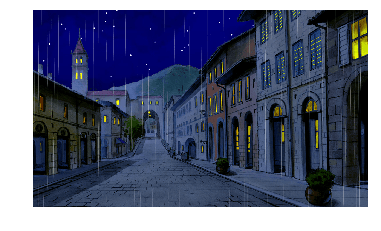

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
def create_downsampling_matrix(size, factor, smooth=True):
    new_size = size // factor
    if smooth:
        value = np.full((factor, 1), 1/factor)
    else:
        value = np.zeros((factor, 1))
        value[0][0] = 1
    return np.kron(np.eye(new_size), value)

In [6]:
y_2 = create_downsampling_matrix(img.shape[0], 2)
x_2 = create_downsampling_matrix(img.shape[1], 2)

In [7]:
y_downsampled = np.matmul(y_2.T, np.moveaxis(img, -1, 0))
y_downsampled = np.moveaxis(y_downsampled, 0, -1)

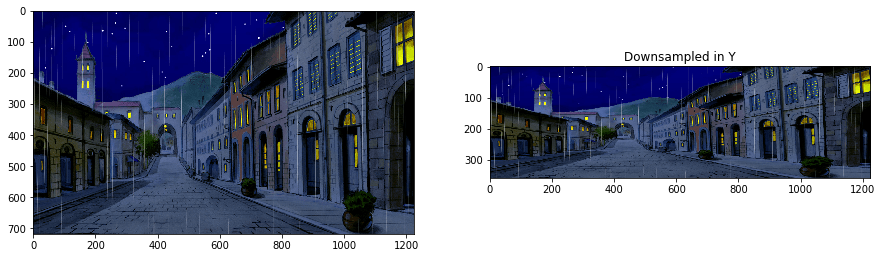

In [8]:
plt.figure(figsize=(15, 15))
plt.title('Original')
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Downsampled in Y')
plt.imshow(y_downsampled)
plt.show()

In [9]:
x_downsampled = np.matmul(np.moveaxis(img, -1, 0), x_2)
x_downsampled = np.moveaxis(x_downsampled, 0, -1)

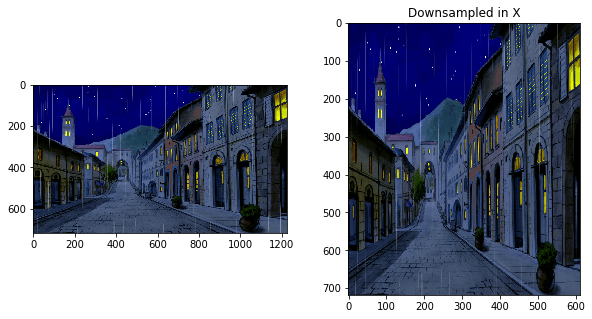

In [10]:
plt.figure(figsize=(10, 5))
plt.title('Original')
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Downsampled in X')
plt.imshow(x_downsampled)
plt.show()

In [11]:
xy_downsampled = np.matmul(y_2.T, np.moveaxis(img, -1, 0))
xy_downsampled = np.matmul(xy_downsampled, x_2)
xy_downsampled = np.moveaxis(xy_downsampled, 0, -1)

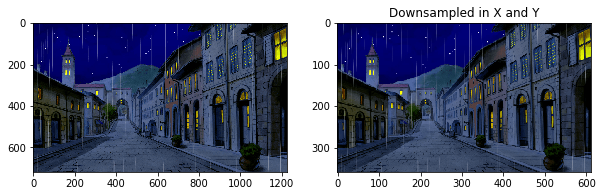

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Original')
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Downsampled in X and Y')
plt.imshow(xy_downsampled)
plt.show()